In [21]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import librosa
import IPython.display
import librosa.display
import os
import random
from matplotlib.pyplot import specgram
import json
import soundfile as sf

In [5]:
random.seed(42)

In [6]:
style.use('ggplot')
%matplotlib inline

In [7]:
def load_file(file_path, sr=44100):
    ts, sr = librosa.load(file_path, sr=sr)
    return ts

In [8]:
def get_raw_sounds(file_paths, sr=44100):
    return [load_file(fp, sr) for fp in file_paths]

In [9]:
def plot_waves(classes, raw_sounds):
    idx = 1
    fig = plt.figure(figsize=(12, 6))
    for name, f in zip(classes, raw_sounds):
        plt.subplot(len(classes), 1, idx)
        librosa.display.waveplot(np.array(f), sr=44100)
        plt.title(name.title())
        idx += 1
    plt.suptitle('Waveplot for Raw Audio', fontsize=18)
    plt.show()

In [10]:
def plot_spectrograms(classes,raw_sounds, sr=44100):
    idx = 1
    fig = plt.figure(figsize=(12, 6))
    for name, f in zip(classes, raw_sounds):
        plt.subplot(len(classes), 1, idx)
        specgram(np.array(f), Fs=22050)
        plt.title(name.title())
        idx += 1
    plt.suptitle('Spectrogram', fontsize=18)
    plt.show()

In [54]:
def plot_log_power_spectrograms(classes,raw_sounds):
    idx = 1
    fig = plt.figure(figsize=(12,6))
    for name, f in zip(classes,raw_sounds):
        plt.subplot(len(classes), 1, idx)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(f))**2, ref=np.max)
        librosa.display.specshow(D, x_axis='time' , y_axis='log')
        plt.title(name.title())
        idx += 1
    plt.suptitle('Log power spectrogram', fontsize=18)
    plt.show()

In [34]:
labels_array = ["no", "yes"]

WAV_PATH = '/Users/akanksha/Downloads/pase_annotations_and_wavs/spaceinvaders_X549THSLUZ_1.wav'
ANN_PATH = '/Users/akanksha/Downloads/pase_annotations_and_wavs/spaceinvaders_X549THSLUZ_1_annotations.json'

# Compute the length of the entire audio segment both as a tensor and in
# the number of seconds
y, sr = librosa.load(WAV_PATH)
print(y.shape)
SECONDS = librosa.get_duration(y=y, sr=sr)
# y = torch.tensor(y).view((1, 1, -1))

# print(f"Shape of entire audio before pase: {y.shape}")
# # total size will be (1, 256, 9409), which are 20484 frames of 256 dims each
# total = pase(y, device="cpu")
# print(f"Shape of entire audio after pase:  {total.shape}")

NUM_FRAMES = y.shape[0]

# Load in the annotations file
annotations = json.load(open(ANN_PATH, "r"))
start_anns = [None] * len(annotations.keys())

data = []
labels = []
count = 0
chunks = {'yes':[], 'no':[]}
# Loop thorugh each yes, no, etc in the json annotations
for key in annotations.keys():
    start = annotations[key][0]
    end   = annotations[key][1]
    word  = annotations[key][2]

    
    # See if a word is 'yes' or 'no'
    for i in range(0, len(labels_array)):
        
        if word.lstrip().rstrip() == labels_array[i]:
#             j = start
#             while j + time_interval <= (end + 0.01):

            # Compute intervals of yes/no at the time size passed under
            # arguments. Proportional calculations are below
            s_proportion = (start-0.1) / SECONDS
            e_proportion = (end+0.1) / SECONDS
            s_index = int(NUM_FRAMES * s_proportion)
            e_index = int(NUM_FRAMES * e_proportion)
            subset = y[s_index:e_index]
#             print(subset.shape)
            sf.write('samples/'+labels_array[i]+'_'+str(count)+'.wav', subset, sr)

            # Conduct a forward pass through the existing PASE network
#                     result = pase(subset)
            chunks[labels_array[i]].append(subset)

            # Append the new sub annotation to the overall dataset as
            # well as the label
#                 data.append(result)
            labels.append(i)

            count+=1
            break

            
print('Yes: ',len(chunks['yes']))
print('No: ',len(chunks['no']))


/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1604799,)
Yes:  26
No:  6


In [42]:
sample_yes = 'samples/yes_17.wav'
sample_no = 'samples/no_15.wav'

Text(0.5, 0.98, 'Wave Plot of a Yes sound')

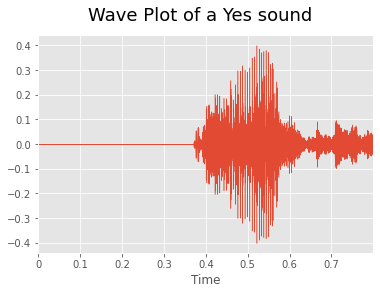

In [43]:
ts, sr = librosa.load(sample_yes)
librosa.display.waveplot(ts, sr=sr)
plt.suptitle('Wave Plot of a Yes sound', fontsize=18)

Text(0.5, 0.98, 'Wave Plot of a No sound')

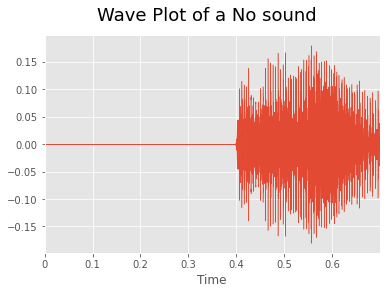

In [44]:
ts, sr = librosa.load(sample_no)
librosa.display.waveplot(ts, sr=sr)
plt.suptitle('Wave Plot of a No sound', fontsize=18)

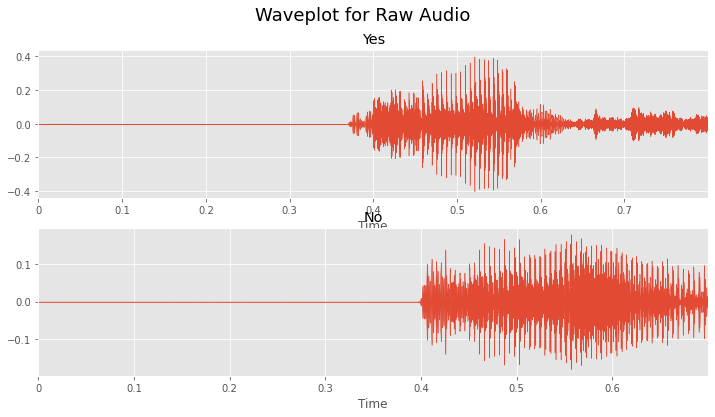

In [45]:
# Look at audio plots together
sound_signals = get_raw_sounds([sample_yes, sample_no])
sound_names = ['yes', 'no'] 
plot_waves(sound_names, sound_signals)

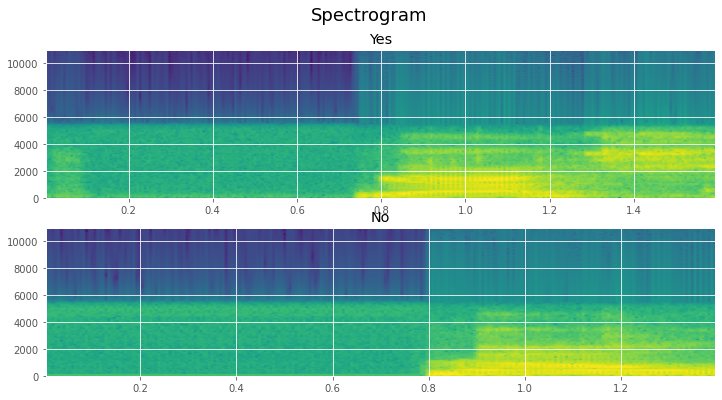

In [46]:
plot_spectrograms(sound_names, sound_signals)

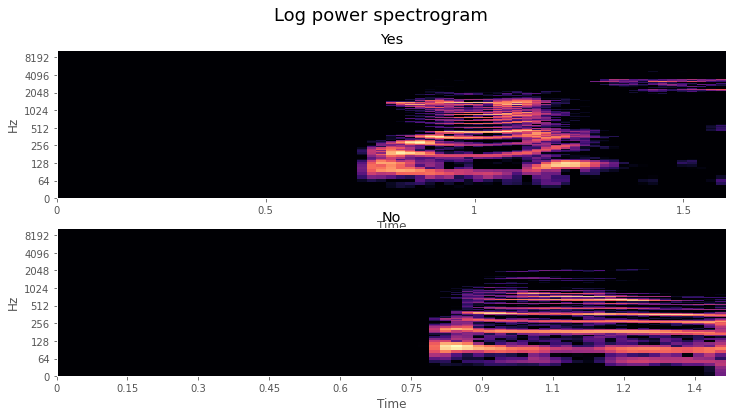

In [55]:
plot_log_power_spectrograms(sound_names, sound_signals)

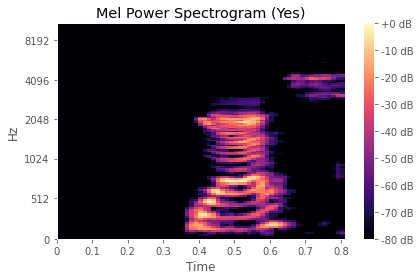

In [56]:
# MFCC for yes
ts_insect, sr_insect = librosa.load(sample_yes, sr=41000)

# Create a Mel Spectrogram
spectrogram_insect = librosa.feature.melspectrogram(ts_insect, sr=sr_insect, n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_spectrogram_insect = librosa.amplitude_to_db(spectrogram_insect, ref=np.max)
librosa.display.specshow(log_spectrogram_insect, sr=sr_insect, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram (Yes)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [3]:
#MFCC for No

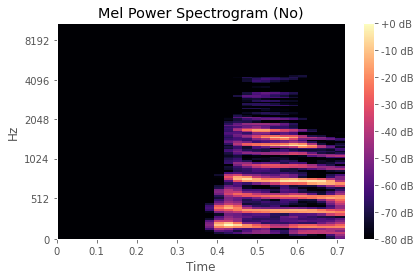

In [58]:
ts_rooster, sr_rooster = librosa.load(sample_no)
# Create a Mel Spectrogram
spectrogram_rooster = librosa.feature.melspectrogram(ts_rooster, sr=sr_rooster, n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_spectrogram_rooster = librosa.amplitude_to_db(spectrogram_rooster, ref=np.max)
librosa.display.specshow(log_spectrogram_rooster, sr=sr_rooster, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram (No)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

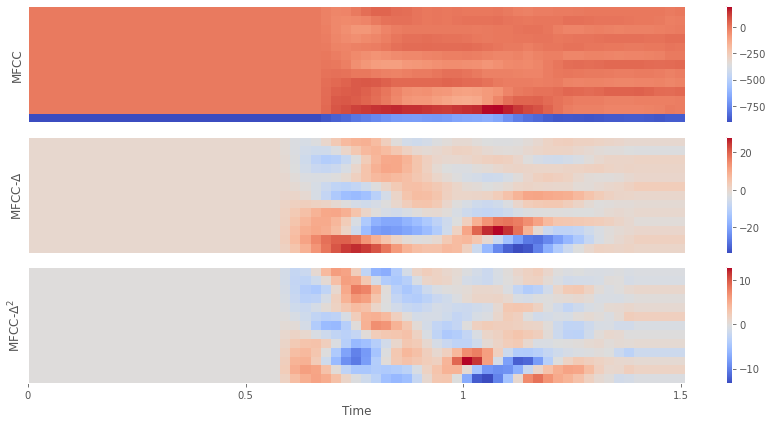

In [60]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(S=log_spectrogram_insect, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

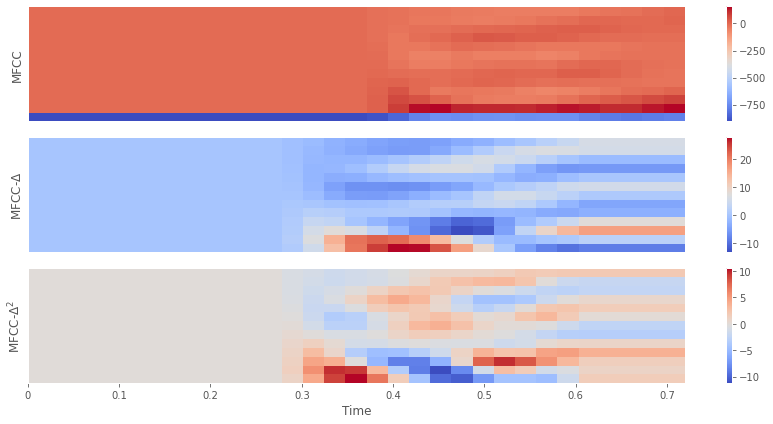

In [61]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(S=log_spectrogram_rooster, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()
